# Homework 3 (100 points)

The goal of this homework is to practice techniques relating to SVD.

## Exercise 1 (65 points)

a) Fetch the "mnist_784" data and store is as a `.csv` (that way you don't have to fetch it every time - which takes about 30s). (4 points)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# your code here
pd.DataFrame(X).to_csv('x.csv')
pd.DataFrame(y).to_csv('y.csv')
dfX = pd.read_csv('x.csv')
dfY = pd.read_csv('y.csv')

b) Plot the singular value plot for a single example of the 0 digit (5 points)

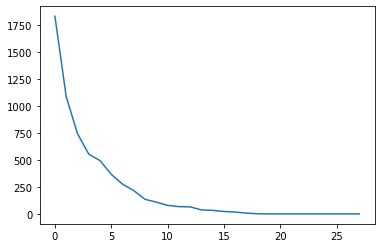

In [8]:
temp = 0
for i, r in df_two.iterrows():
    if r.values[0] == 0:
        temp = i

chart = df_one.iloc[temp][1:]
chart = np.array(chart).reshape(28,28)
u,s,vh = np.linalg.svd(chart)
plt.plot(s)

c) By setting some singular values to 0, plot the approximation of the 0 digit next to the original digit. (5 points)

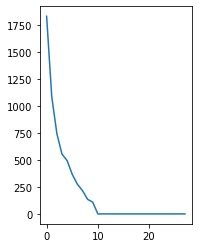

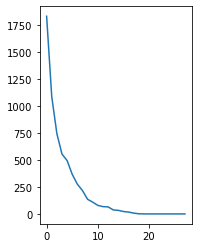

In [13]:
#with modification
s2 = s.copy()
s2[10:]=0
plt.subplot(1,2,1)
plt.plot(s2)
plt.show()

#the original digit
plt.subplot(1,2,2)
plt.plot(s)
plt.show()

d) Consider the entire dataset as a matrix. Perform SVD and store the dataset approximation in a new `.csv` file. Explain why / how you chose a particular rank. (10 points)

In [14]:
u2,s2,vh2 = np.linalg.svd(X, full_matrices=False)
s2[10:] = 0
approximation = u2.dot(np.diag(s2)).dot(vh2)
pd.DataFrame(approximation).to_csv('svd_a.csv')
svd_approximation = pd.read_csv('svd_a.csv')

e) As in homework 2, using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. (10 points)

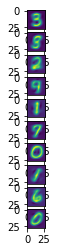

In [21]:
#clustering
kmeans = KMeans(n_clusters=10).fit(approximation)

#centroid
c = []
for cluster in kmeans.cluster_centers_:
    cluster = cluster.reshape(28,28)
    c.append(cluster)

#plotting
for i in range(10):
    plt.subplot(10, 1, i + 1)
    plt.imshow(c[i])
    #print("\n")

f) Repeat e) on the original dataset. Comment on any differences (or lack thereof) you observe. (8 points)

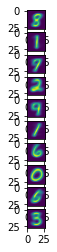

In [19]:
#clustering
kmeans = KMeans(n_clusters=10).fit(X)

#centroid
c2 = []
for cluster in kmeans.cluster_centers_:
    cluster = cluster.reshape(28,28)
    c2.append(cluster)

#plotting
for i in range(10):
    plt.subplot(10, 1, i + 1)
    plt.imshow(c2[i])

I think the main difference I see is that 1f is a lot less blurry. It also had less repeat of the same digits. 

g) Compare the disagreement distance of the clustering obtained in e) to the true labels, to the disagreement distance of the clustering obtained in f) to the true labels. Comment briefly. (8 points)

In [ ]:
def disagreement_dist(P_labels, C_labels):
    return

h) Create a matrix that is the difference between the original dataset and the rank-10 approximation of the dataset. (10 points)

In [23]:
diff = np.abs(X - approximation)
# print(diff)

i) The largest (using euclidean distance from the origin) rows of the matrix could be considered anomalous data points. Briefly explain why. Plot the 10 images responsible for the 10 largest rows. (5 points)

## Exercise 2 (35 points)

a) Modify the code below to pick 4 categories of news articles that you think are minimally related (for example `sci.space` and `rec.sport.baseball`). (3 points)

In [32]:
#imports
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [26]:
categories = ['rec.autos', 'soc.religion.christian', 'talk.politics.mideast', 'comp.graphics'] # your categories here
news_data = fetch_20newsgroups(subset='train', categories=categories)

b) Using the `SnowballStemmer`, stem the words in every article (10 points)

c) Use the `TfidfVectorizer` on the stemmed articles. Set `min_df` and `max_df` to reasonable numbers and briefly explain your reasoning. Store the resulting dataset into a `.csv` file. (7 points)

d) For rank k ranging from 1 to 25:

1. Reduce the dimensionality of the tfidf vectorized data using a dimension reduction technique discussed in class.
2. Apply Kmeans on the reduced dataset to create 4 clusters
3. Record the disagreement distance between the clustering in 2 and the article category

Then plot the recorded disagreement distance per rank. Comment briefly. (15 points)

In [ ]:
disagreement_distance = []
for k in range(1,25):
    dim_reduced_dataset = # your code here
    kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit_predict(dim_reduced_dataset)
    labelsk = kmeans.labels_
    disagreement_distance.append(disagreement_dist(labelsk, news_data.target))

plt.plot(range(1,25), disagreement_distance)
plt.ylabel('Disagreement')
plt.xlabel('Dimension')
plt.show()